In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
np.set_printoptions(precision=3, suppress=True)

In [2]:
dataset = pd.read_csv("Cleaned_data_v2/cleaned_car_data_v2.csv", sep=',')
dataset

C:\Users\colec\AppData\Local\Temp\ipykernel_18396\580287028.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("Cleaned_data_v2/cleaned_car_data_v2.csv", sep=',')


,price,body_type,exterior_color,has_accidents,listed_date,make_name,mileage,model_name,owner_count,year,dealer_zip,major_options,trim_name,wheel_system
0,200.0,SUV / Crossover,BLUE,False,2020-07-07,Ford,150000.0,Explorer,4.0,2005,33178,[3],XLT V6,RWD
1,249.0,Sedan,Cashmere Metallic,True,2020-08-26,Buick,202158.0,Century,5.0,2005,49684,[3],Custom Sedan FWD,FWD
2,347.0,Sedan,Titanium Gray Metallic,False,2020-07-16,Mazda,213512.0,MAZDA3,1.0,2006,84107,[3],i,FWD
3,395.0,SUV / Crossover,Black,False,2020-05-02,Jeep,122610.0,Liberty,3.0,2002,44256,[3],Sport 4WD,4WD
4,400.0,Sedan,SILVER,True,2016-07-26,Oldsmobile,111111.0,Alero,1.0,2002,29379,[3],GX,FWD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2528603,2175000.0,SUV / Crossover,Silver,False,2020-06-28,Nissan,570.0,Rogue Sport,1.0,2020,67801,"[3, 4, 8, 9, 10]",S FWD,FWD
2528604,2250000.0,Sedan,Black,False,2020-05-14,Chevrolet,7852.0,Impala,1.0,2020,67801,"[9, 3, 4, 6]",LT FWD,FWD
2528605,2698500.0,SUV / Crossover,White,False,2020-09-02,Ford,39060.0,Edge,1.0,2018,4096,"[8, 9, 3, 4]",SEL AWD,AWD
2528606,2738900.0,Coupe,Nero,False,2020-02-01,Ferrari,221.0,LaFerrari,2.0,2015,90211,"[8, 4]",Coupe,RWD


In [31]:
dataset['body_type'].unique()

array(['SUV / Crossover', 'Sedan', 'Van', 'Pickup Truck', 'Minivan',
       'Convertible', 'Wagon', 'Coupe', 'Hatchback'], dtype=object)

In [6]:
norm = dataset[dataset['mileage'] >= 15000]
norm = norm[norm['mileage'] < 500000]
norm = norm[norm['price'] < 500000]
norm = norm.drop(columns=['listed_date', 'dealer_zip', 'major_options', 'exterior_color', 'trim_name'])
bodys = {
    "Wagon": 1,
    "Minivan": 2,
    "Van": 3,
    "Hatchback": 4,
    'Pickup Truck': 5,
    'Sedan': 6,
    "SUV / Crossover": 7,
    'Convertible': 8,
    'Coupe': 9
}
wheels = {
    "FWD": 1,
    "AWD": 2,
    "4WD": 3,
    "RWD": 4,
    "4X2": 5
}
norm['body_type'] = norm.apply(lambda row: bodys[row['body_type']], axis=1)
norm['wheel_system'] = norm.apply(lambda row: wheels[row['wheel_system']], axis=1)
norm

,price,body_type,has_accidents,make_name,mileage,model_name,owner_count,year,wheel_system
0,200.0,7,False,Ford,150000.0,Explorer,4.0,2005,4
1,249.0,6,True,Buick,202158.0,Century,5.0,2005,1
2,347.0,6,False,Mazda,213512.0,MAZDA3,1.0,2006,1
3,395.0,7,False,Jeep,122610.0,Liberty,3.0,2002,3
4,400.0,6,True,Oldsmobile,111111.0,Alero,1.0,2002,1
...,...,...,...,...,...,...,...,...,...
2528264,329995.0,8,False,Ferrari,18307.0,Superamerica,2.0,2005,4
2528343,350000.0,9,False,Porsche,70291.0,911,4.0,1994,4
2528484,399990.0,9,False,Lamborghini,21443.0,Aventador,3.0,2016,2
2528509,419900.0,9,True,Porsche,23384.0,911,7.0,1997,2


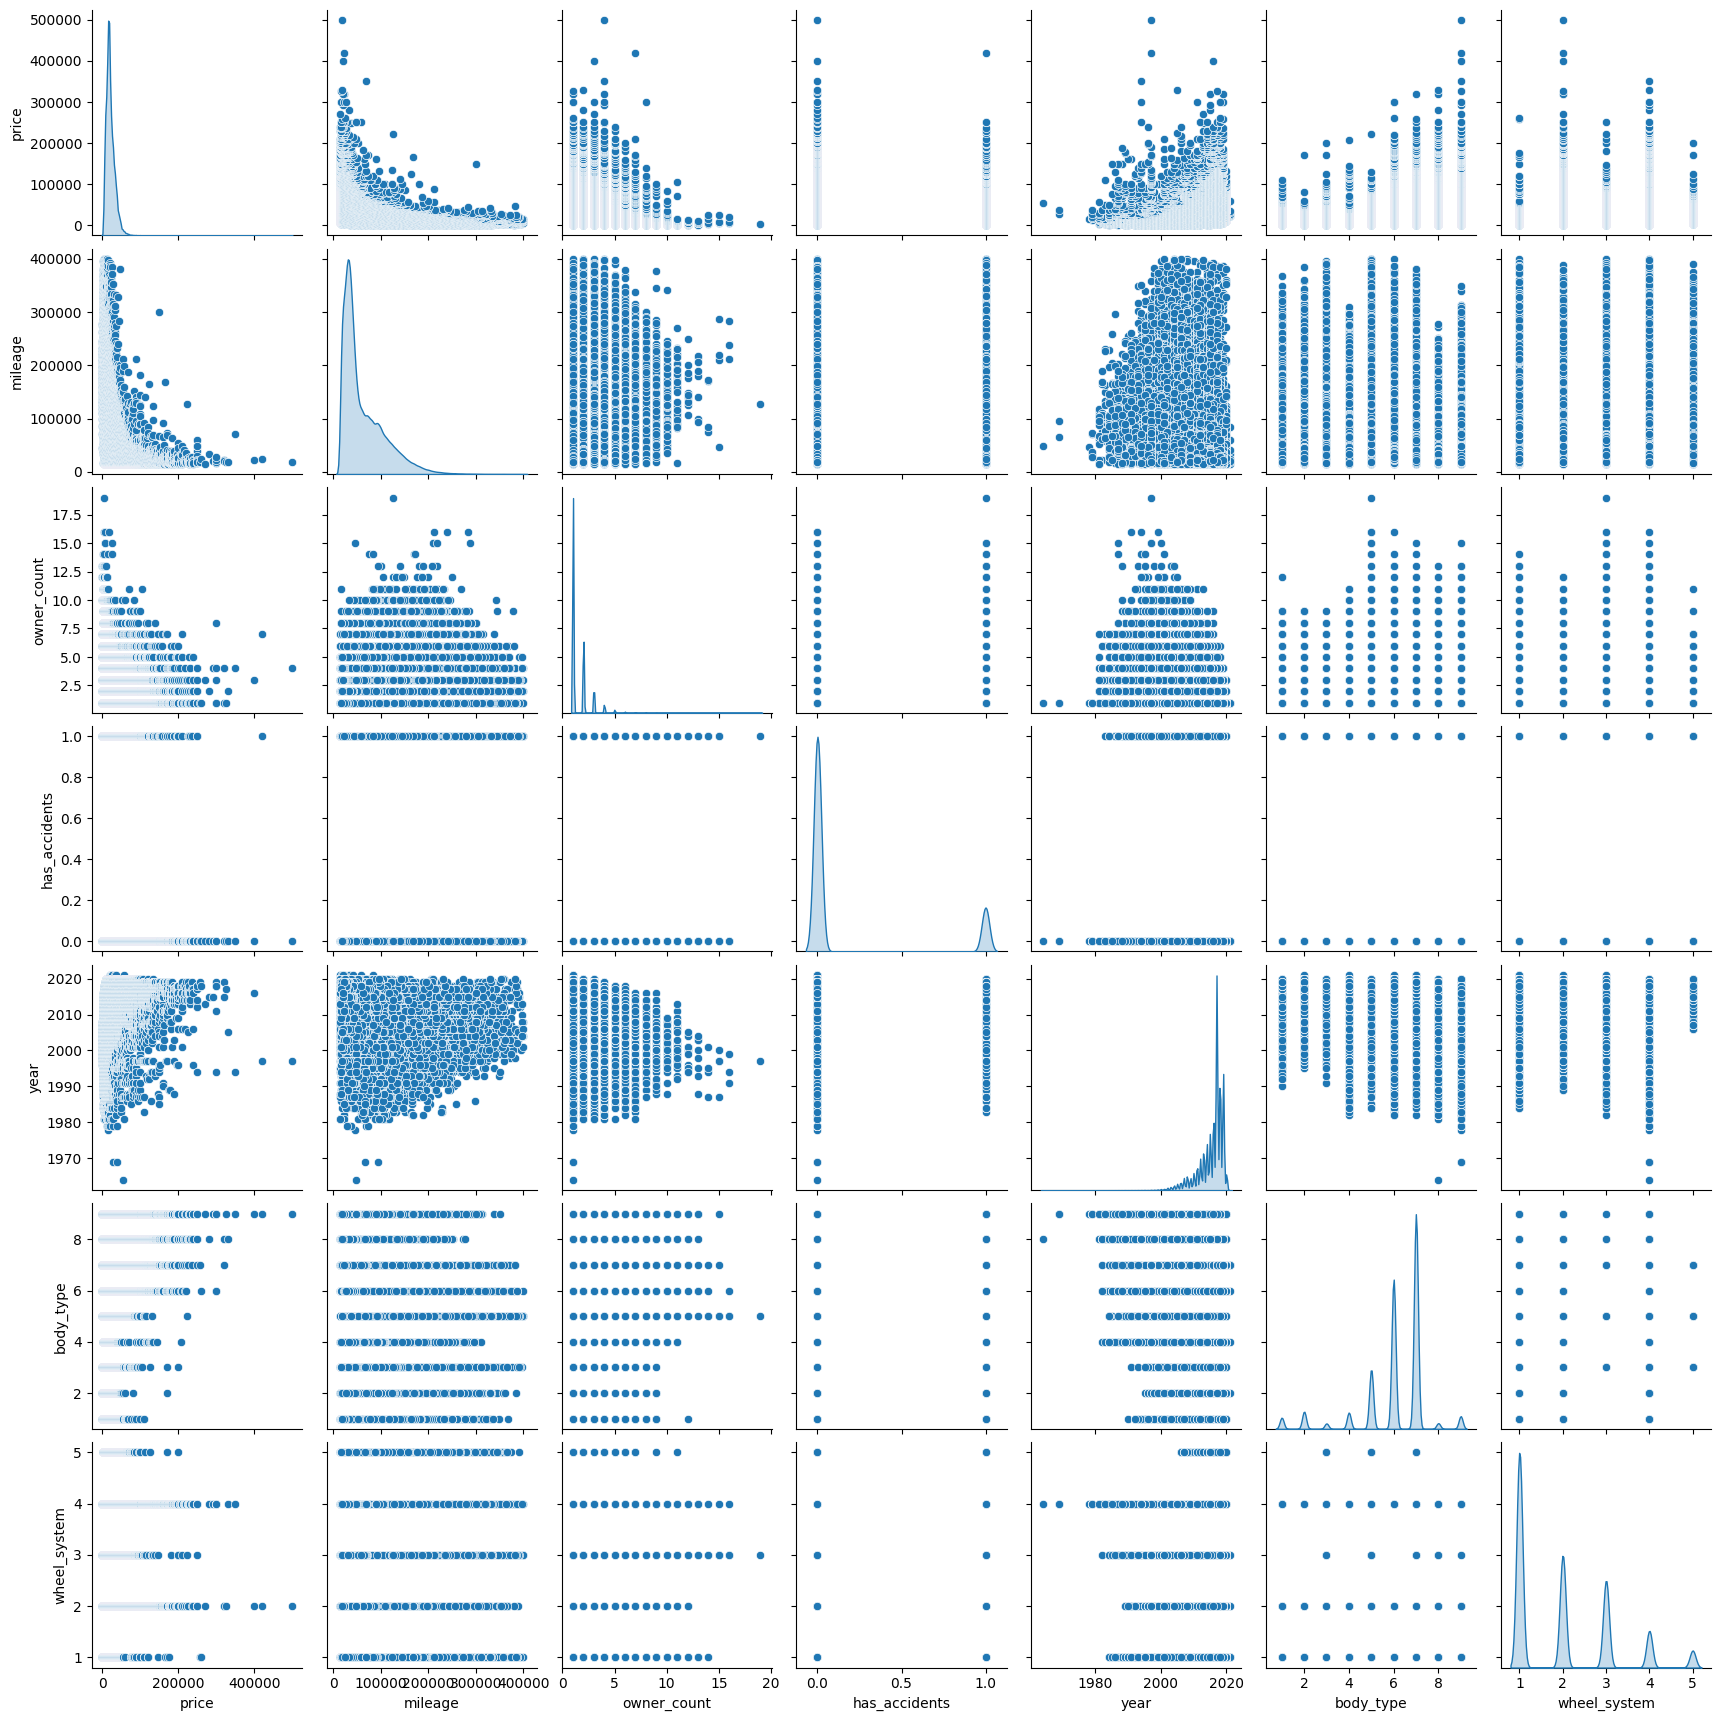

In [7]:
#Not a bad thing to have can show distributions of various columns, but with 80 columns it's too big
#So if you want to see something index the dataset with a list of columns
#[['price', 'mileage', etc.]]
#Would not advise going above 5 different features
sns.pairplot(norm[['price', 'mileage', 'owner_count', 'has_accidents', 'year', 'body_type', 'wheel_system']], diag_kind='kde')

In [10]:
curious = norm[norm['price'] < 100000]
curious

,price,body_type,has_accidents,make_name,mileage,model_name,owner_count,year,wheel_system
0,200.0,7,False,Ford,150000.0,Explorer,4.0,2005,4
1,249.0,6,True,Buick,202158.0,Century,5.0,2005,1
2,347.0,6,False,Mazda,213512.0,MAZDA3,1.0,2006,1
3,395.0,7,False,Jeep,122610.0,Liberty,3.0,2002,3
4,400.0,6,True,Oldsmobile,111111.0,Alero,1.0,2002,1
...,...,...,...,...,...,...,...,...,...
2515693,99999.0,6,False,Kia,89195.0,Cadenza,1.0,2014,1
2515694,99999.0,9,False,Ferrari,23815.0,F430,5.0,2006,4
2515696,99999.0,3,False,Mercedes-Benz,23501.0,Sprinter,1.0,2017,3
2515698,99999.0,6,False,Rolls-Royce,17190.0,Ghost,5.0,2011,4


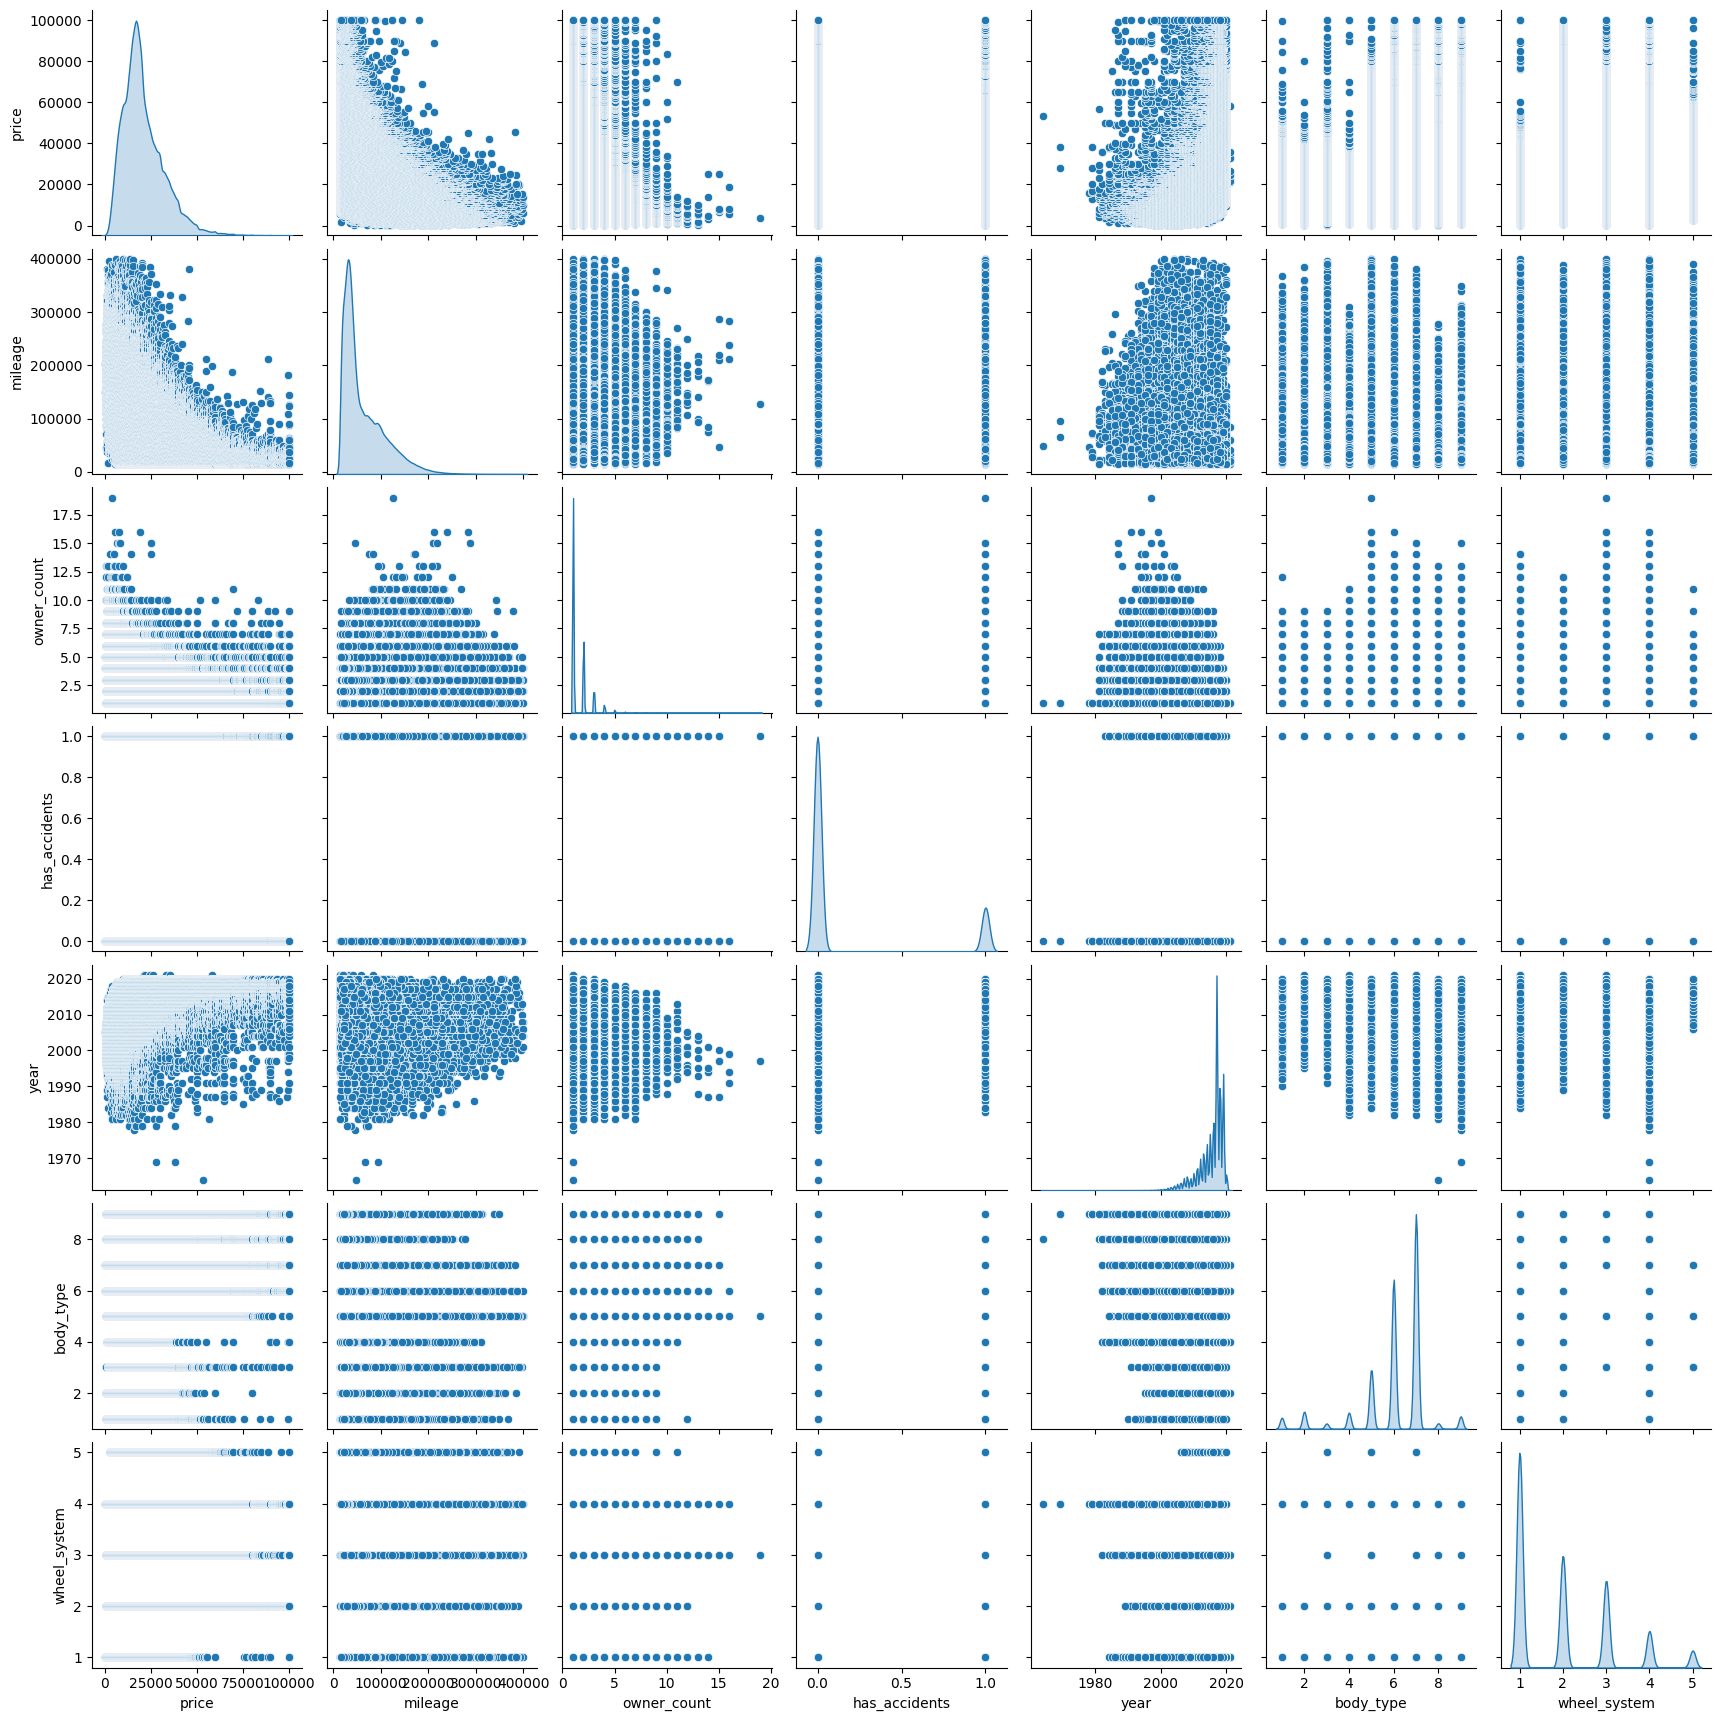

In [11]:
sns.pairplot(curious[['price', 'mileage', 'owner_count', 'has_accidents', 'year', 'body_type', 'wheel_system']], diag_kind='kde')